In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
rating = pd.read_csv(r"BX-Book-Ratings.csv", encoding='ISO-8859-1')
book = pd.read_csv('BX-Books.csv', encoding='ISO-8859-1')
user = pd.read_csv('BX-Users.csv', encoding='ISO-8859-1')

In [3]:
print (rating.shape)
print (book.shape)
print (user.shape)

(1048575, 3)
(271379, 5)
(278859, 3)


In [4]:
rating.isna().sum()

user_id    0
isbn       0
rating     0
dtype: int64

In [5]:
book.isna().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

In [7]:
user.isna().sum()

user_id          0
Location         1
Age         110763
dtype: int64

In [8]:
book.dropna(inplace=True)
book.isna().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

In [9]:
print(book.duplicated().sum())
print(rating.duplicated().sum())
print(user.duplicated().sum())

0
146
0


In [10]:
rating.drop_duplicates(inplace=True)
print(rating.duplicated().sum())

0


In [11]:
book.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication',
       'publisher'],
      dtype='object')

In [12]:
rating.columns

Index(['user_id', 'isbn', 'rating'], dtype='object')

In [13]:
user.columns

Index(['user_id', 'Location', 'Age'], dtype='object')

#book_data = book.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)
book_data = book.columns= book.columns.str.strip().str.lower().str.replace('-', '_')
user_data = user.columns= user.columns.str.strip().str.lower().str.replace('-', '_')
rating_data = rating.columns= rating.columns.str.strip().str.lower().str.replace('-', '_')

In [14]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271376 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271376 non-null  object
 1   book_title           271376 non-null  object
 2   book_author          271376 non-null  object
 3   year_of_publication  271376 non-null  object
 4   publisher            271376 non-null  object
dtypes: object(5)
memory usage: 12.4+ MB


# Take a quick look at the number of unique users and books 

In [15]:
book.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [16]:
book["year_of_publication"].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', 'John Peterman', '1955',
       '1946', '1936', '1930', '2011', '1925', '1948', '1943', '1947',
       '1945', '1923', '2020', '1939', '1926', '1938', '2030',
       '\\"Freedom Song\\""', '1911', '1904', '1949', 'Frank Muir',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', 'ROBERT A. WILSON', '1933', '1902', 'Karen T. Whittenburg',
       '1924', '1921', '1900', '2038', '2026', 'George H. Scherr', '1944',
       '191

there are three string values in the 'year_of_publication' column. Let's check at the corresponding rows in the dataframe.

In [17]:
#dropping the rows with errors as they are very few in number
book.drop(book[book['year_of_publication'] == 'DK Publishing Inc'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'Gallimard'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'John Peterman'].index, inplace = True)
book.drop(book[book['year_of_publication'] == '\\"Freedom Song\\""'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'Frank Muir'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'ROBERT A. WILSON'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'Karen T. Whittenburg'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'George H. Scherr'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'Salvador de Madariaga'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'K.C. Constantine'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'Stan Berenstain'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'Francine Pascal'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'Luella Hill'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'John Alderson Foote'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'Jules Janin'].index, inplace = True)
book.drop(book[book['year_of_publication'] == ' &amp'].index, inplace = True)
book.drop(book[book['year_of_publication'] == ' Learning"'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'Isadora Duncan'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'Beatrix Potter'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'Bart Rulon'].index, inplace = True)
book.drop(book[book['year_of_publication'] == 'Alan Rich'].index, inplace = True)



In [18]:
book.drop(book[book['year_of_publication'] == {'DK Publishing Inc','Gallimard','John Peterman','Frank Muir','Salvador de Madariaga','\\"Freedom Song\\""'}].index, inplace = True)

In [19]:
book["year_of_publication"].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', '1909', '2008', '1378', '1919', '1922',
       '1

In [20]:
#changing the publication year to int type before feeding it to the models
book['year_of_publication'] = book['year_of_publication'].astype('int')

In [21]:
print(sorted(book['year_of_publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


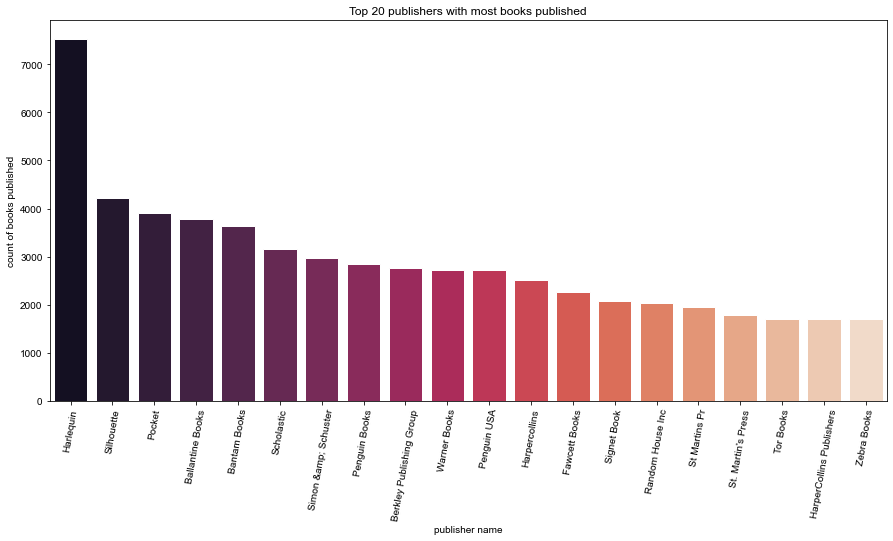

In [22]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = book['publisher'].value_counts()[:20].index,y = book['publisher'].value_counts()[:20].values,
            palette = 'rocket').set(title = 'Top 20 publishers with most books published',xlabel = 'publisher name',ylabel = 'count of books published')
plt.xticks(rotation = 80)
plt.show()

Harlequin can be seen as the publication house that has published the most number of books almost close to 7600 books, followed by Silhouette then Pocket and others in the sequence.

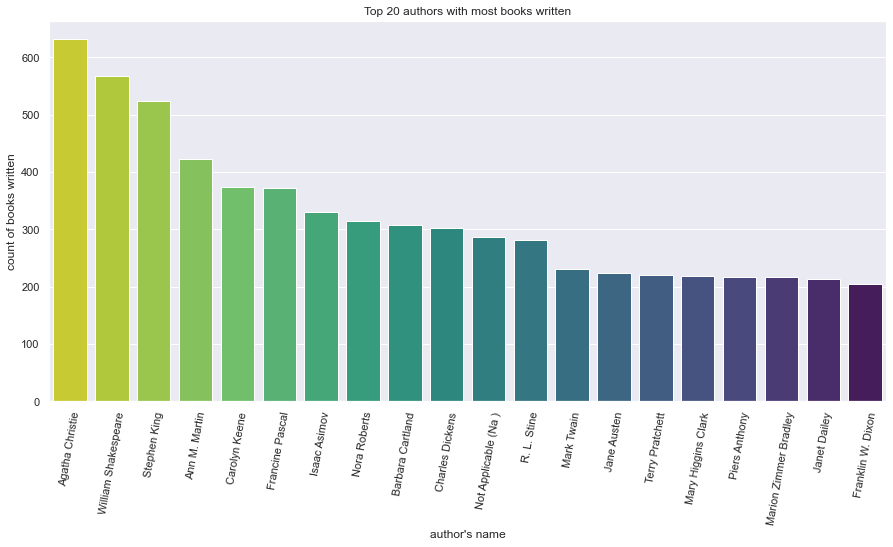

In [23]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = book['book_author'].value_counts()[:20].index,y = book['book_author'].value_counts()[:20].values,
            palette = 'viridis_r').set(title = 'Top 20 authors with most books written',xlabel = "author's name",ylabel = 'count of books written')
plt.xticks(rotation = 80)
plt.show()


Agatha Christie has authored the most books in our dataset with 600 books. William Shakespeare, Stephen Hawking and Ann M. Martin are also some of the authors who have written 600+ books.

Now look at user dataset

In [24]:
user.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [25]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278859 non-null  object 
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB


In [26]:
print(sorted(user["Age"].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

As we can can see in above cell, The minimum age starting from age "0" and its goes to "244" which is practically not possible so we will craete function for filter the data, for age 05 to 90 and rest will be replaced by mean

In [27]:
#replacing the less than 5 and more than 85 values with mean of the age   
user.loc[(user['Age'] < 5) | (user['Age'] > 90),'Age'] = np.nan
user['Age'].fillna((user['Age'].mean()), inplace=True)

print(sorted(user['Age'].unique()))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.72384041634689, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


In [28]:
#converting the age to integer type 
user['Age'] = user['Age'].astype('int')

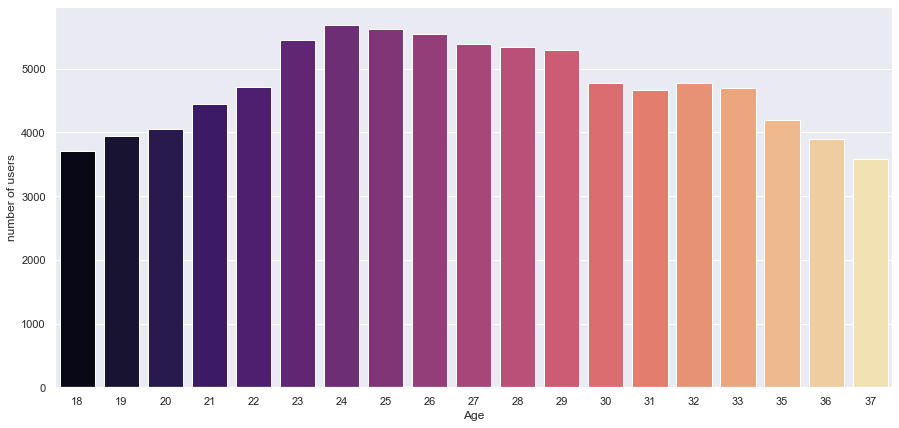

In [29]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = user['Age'].value_counts()[1:20].index,y = user['Age'].value_counts()[1:20].values,
            palette = 'magma').set(xlabel = "Age",ylabel = 'number of users')
plt.show()

Lets do EDA on Rating

In [30]:
rating.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [31]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048429 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1048429 non-null  int64 
 1   isbn     1048429 non-null  object
 2   rating   1048429 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 32.0+ MB


In [32]:
rating['rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [33]:
#keeping only the records of ratings for the books and users whose data is there in the respective users and books csv file
new_ratings = rating[rating['isbn'].isin(book['isbn'])]
new_ratings = new_ratings[new_ratings['user_id'].isin(user['user_id'])]

In [34]:
new_ratings.head()

,user_id,isbn,rating
9561,2,195153448,0
9563,8,2005018,5
9564,8,60973129,0
9565,8,374157065,0
9566,8,393045218,0


In [35]:
#dropping the books whose ratings are zero
new_ratings = new_ratings.loc[new_ratings['rating'] != 0]

In [36]:
new_ratings.head()

,user_id,isbn,rating
9563,8,2005018,5
9571,8,074322678X,5
9575,8,887841740,5
9576,8,1552041778,5
9578,8,1567407781,6


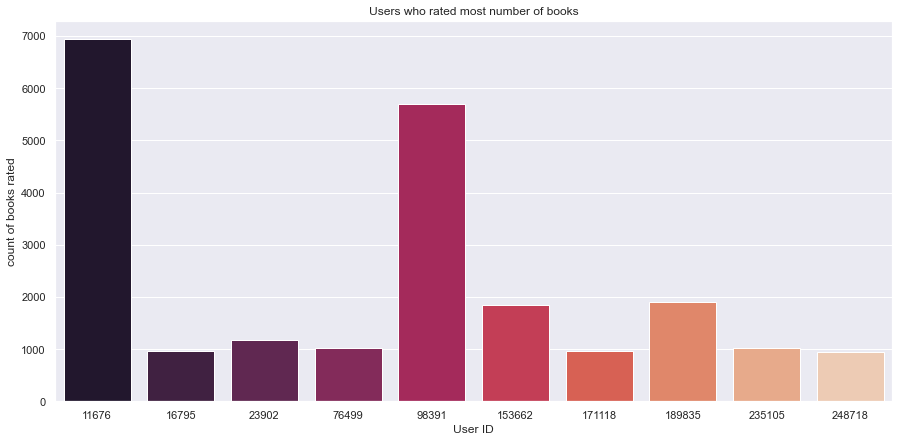

In [37]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = new_ratings['user_id'].value_counts()[0:10].index,y = new_ratings['user_id'].value_counts()[0:10].values,
            palette = 'rocket').set(title="Users who rated most number of books",xlabel = "User ID",ylabel = 'count of books rated')
plt.show()

id 11676 and 98391 have rated the most number of books. They seem to be showing a keen interest

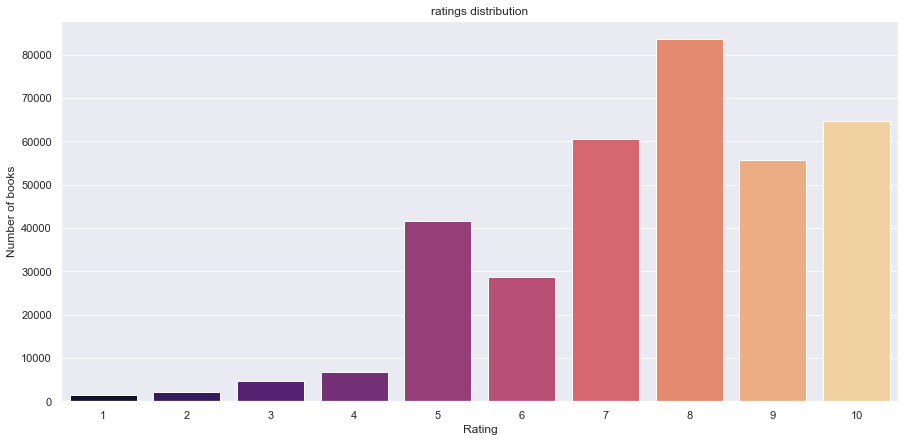

In [38]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = new_ratings['rating'].value_counts().index,y = new_ratings['rating'].value_counts().values,
            palette = 'magma').set(title="ratings distribution",xlabel = "Rating",ylabel = 'Number of books')
plt.show()

From above plot we can say that users had given really positive ratings (The average rating is 7 and most of users voted above that also).

# POPULARITY BASED MODEL

### Highest total book rating
Books are arranged in such a way that the books with the highest sum total of ratings are at the top.

In [39]:
ratings_sum=pd.DataFrame(new_ratings.groupby(['isbn'])['rating'].sum())

In [40]:
merged_df_1 = ratings_sum.merge(book, left_index=True, right_on ='isbn')

In [41]:
final_sum_df = merged_df_1.sort_values(by=['rating'], ascending=False)

In [42]:
final_sum_df.head(10)

,rating,isbn,book_title,book_author,year_of_publication,publisher
408,5165,316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,3798,385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,2864,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2528,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
356,2378,142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2326,971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2292,60928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2129,446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
118,2015,671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star
231,2006,452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books


# Most number of times rated

### Books are arranged in such a way that books that have been rated the most number of times irrespective of the rating are at the top.

In [43]:
ratings_count=pd.DataFrame(new_ratings.groupby(['isbn'])['rating'].count())

In [44]:
merged_df_2 = ratings_count.merge(book, left_index=True, right_on ='isbn')

In [45]:
final_count_df = merged_df_2.sort_values(by=['rating'], ascending=False)

In [46]:
final_count_df.head(10)

,rating,isbn,book_title,book_author,year_of_publication,publisher
408,632,316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
26,524,971880107,Wild Animus,Rich Shapero,2004,Too Far
748,450,385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,351,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
1105,292,60928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
2143,283,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
356,280,142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
706,263,446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
305,258,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company
231,253,452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books


# MEMORY BASED COLLABORATIVE FILTERING - ITEM BASED

In [47]:
#merging the books, users and ratings file
merge_df_1=book.merge(rating,how="left", on="isbn")
merge_df_2=merge_df_1.merge(user,how="left", on="user_id")
df=merge_df_2.copy()
df.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,rating,Location,Age
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34.0
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0
3,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a",34.0
4,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada",34.0


In [48]:
#dropping the location and age columns as they are not relevant for recommender model
df.drop(['Location','Age'], axis=1, inplace=True)

In [49]:
#we will only keep the observations that have book_rating greater than 0
df = df[df["rating"]>0]

In [50]:
df.shape

(351853, 7)

In [52]:
#counting the number of times the books have been rated
count_of_books = pd.DataFrame(df["book_title"].value_counts())

In [53]:
count_of_books.sort_values("book_title", ascending=False)

,book_title
The Lovely Bones: A Novel,635
Wild Animus,526
The Da Vinci Code,459
The Secret Life of Bees,377
The Nanny Diaries: A Novel,355
...,...
Trials of the Visionary Mind: Spiritual Emergency and the Renewal Process (Suny Series in Transpersonal and Humanistic Psychology),1
In a Dark Place: The Story of a True Haunting,1
Dracula (Temporis Collection),1
"The Bluegrass Conspiracy: An Inside Story of Power, Greed, Drugs and Murder",1


In [55]:
#All the books that have been rated less than 100 times - we will count them as rarely read books
rare_books = count_of_books[count_of_books["book_title"] <= 100].index

In [59]:
rare_books.shape

(128412,)

In [60]:
#All the books that are not in the rare books we will count them as frequently read books
frequent_books = df[~df["book_title"].isin(rare_books)]
frequent_books.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,rating
30,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676.0,9.0
31,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,29526.0,9.0
33,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,46398.0,9.0
35,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,49635.0,9.0
36,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,67958.0,10.0


In [63]:
#Let's create the User-Book matrix for the frequently read books
books_user_df = frequent_books.pivot_table(index=["user_id"], columns=["book_title"], values="rating",fill_value=0)
books_user_df.head(10)

book_title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Map of the World,A Painted House,A Prayer for Owen Meany,A Time to Kill,...,Violets Are Blue,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
user_id,,,,,,,,,,,,,,,,,,,,,
16.0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0.0,0,0,0,0,0,0.0,0,0,0
26.0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0.0,0,0,0,0,0,0.0,0,0,0
51.0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0.0,0,0,0,0,0,0.0,0,0,0
91.0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0.0,0,0,0,0,0,0.0,0,0,0
114.0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0.0,0,0,0,0,0,0.0,0,0,0
165.0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0.0,0,0,0,0,0,0.0,0,0,0
183.0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0.0,0,0,0,0,0,0.0,0,0,0
226.0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0.0,0,0,0,0,0,0.0,0,0,0
242.0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0.0,0,0,0,0,0,0.0,0,0,0


In [64]:
books_user_df.shape

(14106, 164)

In [65]:
book="To Kill a Mockingbird"

In [66]:
book=books_user_df[book]
book.sort_values(ascending=False)

user_id
138543.0    10
37712.0     10
31556.0     10
160509.0    10
108827.0    10
            ..
84164.0      0
84174.0      0
84178.0      0
84226.0      0
278846.0     0
Name: To Kill a Mockingbird, Length: 14106, dtype: int64

In [67]:
books_user_df.corrwith(book,method='pearson').sort_values(ascending=False)[:10]

book_title
To Kill a Mockingbird                               1.000000
Lord of the Flies                                   0.081894
Brave New World                                     0.079276
The Catcher in the Rye                              0.079031
The Color Purple                                    0.074497
Animal Farm                                         0.063574
Harry Potter and the Chamber of Secrets (Book 2)    0.056715
Snow Falling on Cedars                              0.055598
The Joy Luck Club                                   0.053751
STONES FROM THE RIVER                               0.053739
dtype: float64

In [68]:
recommend_books=books_user_df.corrwith(book).sort_values(ascending=False)[:10]
rec_books_list=list(recommend_books.index)

rec_books_list


['To Kill a Mockingbird',
 'Lord of the Flies',
 'Brave New World',
 'The Catcher in the Rye',
 'The Color Purple',
 'Animal Farm',
 'Harry Potter and the Chamber of Secrets (Book 2)',
 'Snow Falling on Cedars',
 'The Joy Luck Club',
 'STONES FROM THE RIVER']

# MODEL BASED COLLABORATIVE FILTERING 1

In [2]:
%%capture
!pip install scikit-surprise

In [3]:
!pip install surprise

  ERROR: Command errored out with exit status 1:
   command: 'C:\ANACONDA\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Tech Merge\\AppData\\Local\\Temp\\pip-install-0dr0dymw\\scikit-surprise_f0df9b77d9ac473c9a9d2bbd4a6a8d3d\\setup.py'"'"'; __file__='"'"'C:\\Users\\Tech Merge\\AppData\\Local\\Temp\\pip-install-0dr0dymw\\scikit-surprise_f0df9b77d9ac473c9a9d2bbd4a6a8d3d\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Tech Merge\AppData\Local\Temp\pip-wheel-qrhyaaby'
       cwd: C:\Users\Tech Merge\AppData\Local\Temp\pip-install-0dr0dymw\scikit-surprise_f0df9b77d9ac473c9a9d2bbd4a6a8d3d\
  Complete output (50 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creatin


  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
    Running setup.py install for scikit-surprise: started
    Running setup.py install for scikit-surprise: finished with status 'error'


  copying surprise\model_selection\__init__.py -> build\lib.win-amd64-3.9\surprise\model_selection
  creating build\lib.win-amd64-3.9\surprise\prediction_algorithms
  copying surprise\prediction_algorithms\algo_base.py -> build\lib.win-amd64-3.9\surprise\prediction_algorithms
  copying surprise\prediction_algorithms\baseline_only.py -> build\lib.win-amd64-3.9\surprise\prediction_algorithms
  copying surprise\prediction_algorithms\knns.py -> build\lib.win-amd64-3.9\surprise\prediction_algorithms
  copying surprise\prediction_algorithms\predictions.py -> build\lib.win-amd64-3.9\surprise\prediction_algorithms
  copying surprise\prediction_algorithms\random_pred.py -> build\lib.win-amd64-3.9\surprise\prediction_algorithms
  copying surprise\prediction_algorithms\__init__.py -> build\lib.win-amd64-3.9\surprise\prediction_algorithms
  running egg_info
  writing scikit_surprise.egg-info\PKG-INFO
  writing dependency_links to scikit_surprise.egg-info\dependency_links.txt
  writing entry points

In [4]:
!pip install scikit-surprise==1.0.4

  Using cached scikit-surprise-1.0.4.tar.gz (2.3 MB)
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
    Running setup.py install for scikit-surprise: started
    Running setup.py install for scikit-surprise: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\ANACONDA\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Tech Merge\\AppData\\Local\\Temp\\pip-install-tfr0wvz5\\scikit-surprise_73328b23116344069c5be91efa6b2b01\\setup.py'"'"'; __file__='"'"'C:\\Users\\Tech Merge\\AppData\\Local\\Temp\\pip-install-tfr0wvz5\\scikit-surprise_73328b23116344069c5be91efa6b2b01\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Tech Merge\AppData\Local\Temp\pip-wheel-_zh6q_st'
       cwd: C:\Users\Tech Merge\AppData\Local\Temp\pip-install-tfr0wvz5\scikit-surprise_73328b23116344069c5be91efa6b2b01\
  Complete output (44 lines):
  C:\ANACONDA\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-

In [3]:
from surprise import NMF, SVD, SVDpp, KNNBasic, KNNWithMeans, KNNWithZScore, CoClustering
from surprise.model_selection import cross_validate
from surprise import Reader, Dataset

ModuleNotFoundError: No module named 'surprise'

In [ ]:
df_surprise1 = df[['user_id','book_title','rating']]

In [ ]:
df_surprise1.head()

In [ ]:
df_surprise1.columns = ['user_id', 'item_id', 'rating']

In [ ]:
df_surprise1.head()

In [ ]:
df_surprise1['reviews'] = df_surprise1.groupby(['itemID'])['rating'].transform('count')

In [ ]:
df_surprise1= df_surprise1[df_surprise1.reviews>100][['userID', 'itemID', 'rating']]
df_surprise1.shape

In [ ]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_surprise1, reader)


In [ ]:
# get the list of the movie ids
unique_ids = df_surprise1['itemID'].unique()

# get the list of the ids that the userid 1001 has rated
iids1001 = df_surprise1.loc[df_surprise1['userID']==1001, 'itemID']

# remove the rated movies for the recommendations
movies_to_predict = np.setdiff1d(unique_ids,iids1001)

In [ ]:
algo = NMF()
algo.fit(data.build_full_trainset())

my_recs = []
for iid in movies_to_predict:
    my_recs.append((iid, algo.predict(uid=1001,iid=iid).est))
    
pd.DataFrame(my_recs, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(10)

In [ ]:
algo = SVD()
algo.fit(data.build_full_trainset())

my_recs = []
for iid in movies_to_predict:
    my_recs.append((iid, algo.predict(uid=1001,iid=iid).est))
    
pd.DataFrame(my_recs, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(10)

In [ ]:
algo = SVDpp()
algo.fit(data.build_full_trainset())

my_recs = []
for iid in movies_to_predict:
    my_recs.append((iid, algo.predict(uid=1001,iid=iid).est))
    
pd.DataFrame(my_recs, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(10)

In [ ]:
algo = KNNWithZScore()
algo.fit(data.build_full_trainset())

my_recs = []
for iid in movies_to_predict:
    my_recs.append((iid, algo.predict(uid=1001,iid=iid).est))
    
pd.DataFrame(my_recs, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(10)


In [ ]:
algo = CoClustering()
algo.fit(data.build_full_trainset())

my_recs = []
for iid in movies_to_predict:
    my_recs.append((iid, algo.predict(uid=1001,iid=iid).est))
    
pd.DataFrame(my_recs, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(10)

In [ ]:

cv = []
# Iterate over all recommender system algorithms
for recsys in [NMF(), SVD(), SVDpp(), KNNWithZScore(), CoClustering()]:
    # Perform cross validation
    tmp = cross_validate(recsys, data, measures=['RMSE'], cv=3, verbose=False)
    cv.append((str(recsys).split(' ')[0].split('.')[-1], tmp['test_rmse'].mean()))

pd.DataFrame(cv, columns=['RecSys', 'RMSE'])